Now that I have all of the data that I wanted to scrape, I will import them into a file to do some data analysis

In [1]:
import pandas as pd
from sklearn import datasets
import matplotlib as plt
import re

# Load CSV files into pandas dataframes
jp_df = pd.read_csv('japan-top50pages.csv')

# Function to convert price range to average
def convert_price_to_avg(price):
    price_map = {
        "～JPY 999": 999,
        "JPY 1,000～JPY 1,999": 1500,
        "JPY 2,000～JPY 2,999": 2500,
        "JPY 3,000～JPY 3,999": 3500,
        "JPY 4,000～JPY 4,999": 4500,
        "JPY 5,000～JPY 5,999": 5500,
        "JPY 6,000～JPY 7,999": 7000,
        "JPY 8,000～JPY 9,999": 9000,
        "JPY 10,000～JPY 14,999": 12500,
        "JPY 15,000～JPY 19,999": 17500,
        "JPY 20,000～JPY 29,999": 25000,
        "JPY 30,000～JPY 39,999": 35000,
        "JPY 40,000～JPY 49,999": 45000,
        "JPY 50,000～JPY 59,999": 55000,
        "JPY 60,000～JPY 79,999": 70000,
        "JPY 80,000～JPY 99,999": 90000,
        "JPY 100,000～": 100000
    }
    return price_map.get(price, None)

# Apply the price function to the data
jp_df['Avg_Lunch'] = jp_df['Lunch Price'].apply(convert_price_to_avg)
jp_df['Avg_Dinner'] = jp_df['Dinner Price'].apply(convert_price_to_avg)


# Extract the ID number from the url of each restaurant
jp_df['ID'] = jp_df['URL'].apply(lambda x: re.findall(r'\d+', x)[-1])
jp_df['ID'] = jp_df['ID'].astype(int)

# Split the genre column into multiple columns to form tags for each restaurant that can be referenced later
jp_df['Genre'] = jp_df['Genre'].str.strip()
tags = jp_df['Genre'].str.split(pat=',', expand=True)

# Assign the restaurant ID number to each tag
tags['ID'] = jp_df['ID']

# Create a table with each tag and the restaurant ID number to allow for easy reference later
tags = tags.melt(id_vars='ID')

# Remove the extra columns and null values generated from the split of the genre column
tags = tags.drop(columns=tags.columns[1:-1])
tags.dropna(subset=['value'], inplace=True)

# Rename the columns to be more descriptive
tags.columns = ['ID', 'Tag']

# Merge the original dataframe with the tags dataframe to create a single dataframe with all the information. The table has multiple rows for each restaurant, one for each tag.
merged_df = pd.merge(jp_df, tags, on='ID', how = 'left', validate='one_to_many')

# Define the desired column order
desired_order = ['ID',  'Avg_Lunch',  'Avg_Dinner', 'Tag', 'Genre', 'Name', 'Address', 'Station', 'Rating', 'Reviews','Lunch Price','Dinner Price', 'URL']

# Reorder the columns in merged dataframe
merged_df = merged_df[desired_order]

# Display the dataframe to verify the order
merged_df

,ID,Avg_Lunch,Avg_Dinner,Tag,Genre,Name,Address,Station,Rating,Reviews,Lunch Price,Dinner Price,URL
0,13018162,45000.0,45000.0,Sushi,Sushi,Sugi ta,東京都中央区日本橋蛎殻町1-33-6 ビューハイツ日本橋 B1F,Suitengumae,4.66,808,"JPY 40,000～JPY 49,999","JPY 40,000～JPY 49,999",https://tabelog.com/en/tokyo/A1302/A130204/130...
1,13136847,NaN,55000.0,Japanese Cuisine,Japanese Cuisine,Hoshino,東京都港区新橋5-31-3,Onarimon,4.63,249,-,"JPY 50,000～JPY 59,999",https://tabelog.com/en/tokyo/A1314/A131401/131...
2,17011166,45000.0,45000.0,Japanese Cuisine,Japanese Cuisine,Kata ori,石川県金沢市並木町3-36,Hokutetsu Kanazawa,4.62,319,"JPY 40,000～JPY 49,999","JPY 40,000～JPY 49,999",https://tabelog.com/en/ishikawa/A1701/A170101/...
3,26030764,NaN,55000.0,Japanese Cuisine,Japanese Cuisine,Doujin,京都府京都市左京区仁王門通新柳馬場東入ル菊鉾町291-1,Sanjo Keihan,4.61,213,-,"JPY 50,000～JPY 59,999",https://tabelog.com/en/kyoto/A2601/A260301/260...
4,13196420,NaN,45000.0,Sushi,Sushi,Ama Moto,東京都港区東麻布1-7-9 ザ・ソノビル 102,Akabanebashi,4.60,523,-,"JPY 40,000～JPY 49,999",https://tabelog.com/en/tokyo/A1314/A131401/131...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,13110008,999.0,1500.0,Cake,"Cake, Cafe",Materieru,福岡県福岡市中央区薬院2-6-19,Oyama,3.87,709,～JPY 999,"JPY 1,000～JPY 1,999",https://tabelog.com/en/tokyo/A1322/A132203/131...
1445,13110008,999.0,1500.0,Cafe,"Cake, Cafe",Materieru,福岡県福岡市中央区薬院2-6-19,Oyama,3.87,709,～JPY 999,"JPY 1,000～JPY 1,999",https://tabelog.com/en/tokyo/A1322/A132203/131...
1446,13110652,12500.0,25000.0,Italian,"Italian, Innovative, Meat dishes",IL TEATRINO DA SALONE,東京都千代田区有楽町1-1-2 東京ミッドタウン日比谷 3F,Hiro o,3.87,672,"JPY 10,000～JPY 14,999","JPY 20,000～JPY 29,999",https://tabelog.com/en/tokyo/A1307/A130703/131...
1447,13110652,12500.0,25000.0,Innovative,"Italian, Innovative, Meat dishes",IL TEATRINO DA SALONE,東京都千代田区有楽町1-1-2 東京ミッドタウン日比谷 3F,Hiro o,3.87,672,"JPY 10,000～JPY 14,999","JPY 20,000～JPY 29,999",https://tabelog.com/en/tokyo/A1307/A130703/131...


Mean Squared Error: 0.02285224113845608
R^2 Score: 0.23469146588406398
                  Feature  Importance
1              Avg_Dinner    0.331399
0               Avg_Lunch    0.272476
120             Tag_Sushi    0.025593
105  Tag_Japanese Cuisine    0.021170
112            Tag_Ryokan    0.019821
..                    ...         ...
126          Tag_Tsukemen    0.000006
19      Tag_ Delicatessen    0.000006
5              Tag_ Bagel    0.000005
21        Tag_ Dining bar    0.000005
122           Tag_Sweets     0.000003

[133 rows x 2 columns]


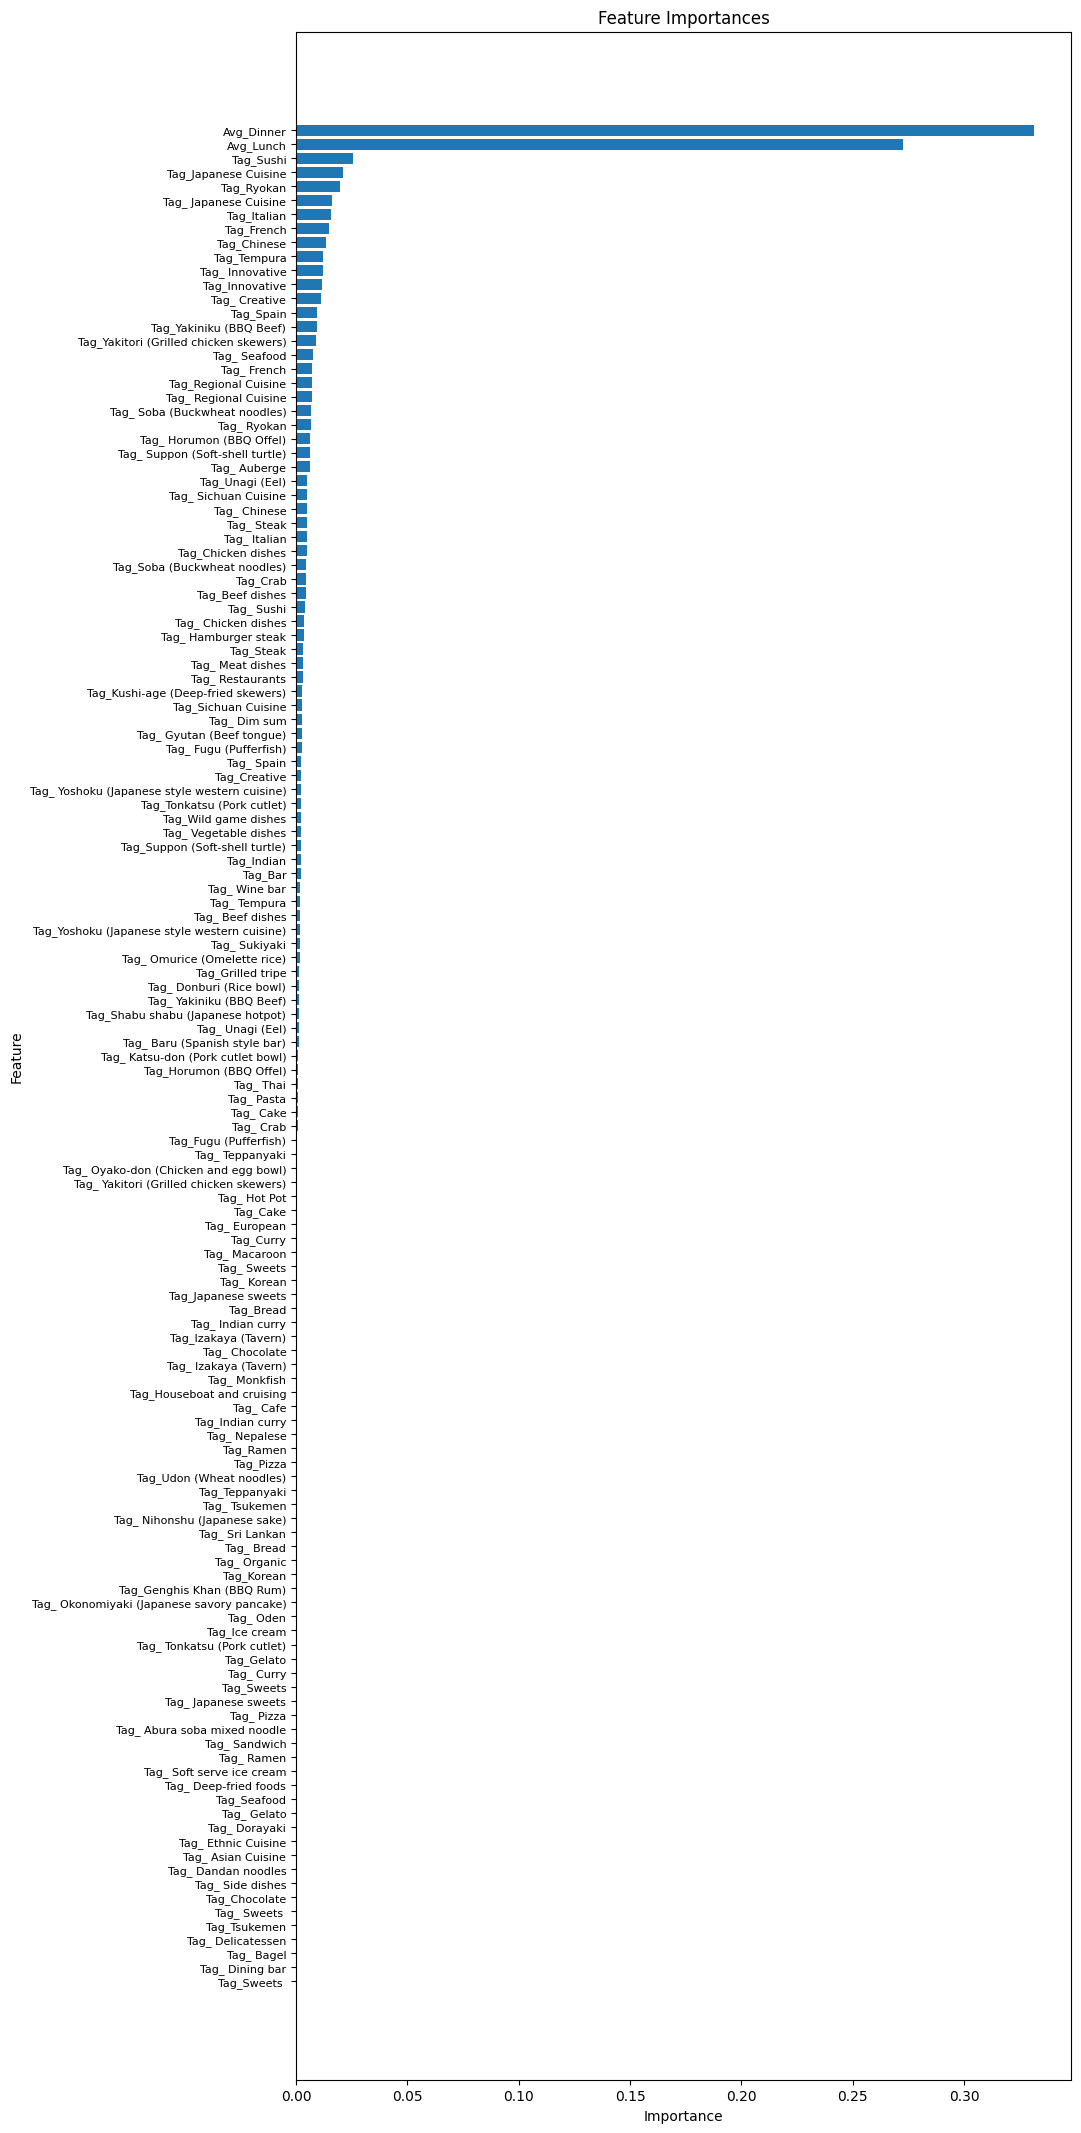

Confusion Matrix:
[[ 39  82]
 [  8 161]]
ROC AUC Score: 0.7457577387647318


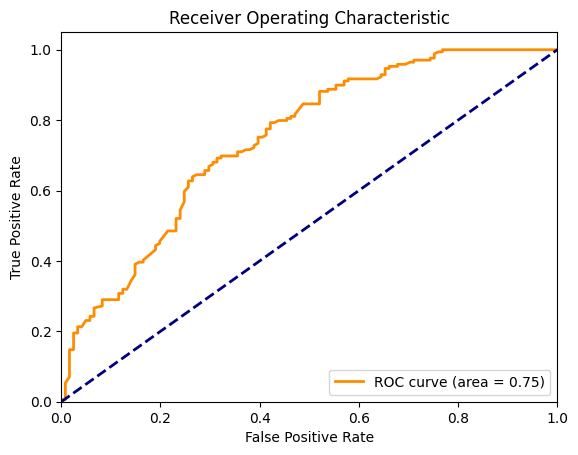

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Define the features and target variable
X = merged_df[['Avg_Lunch', 'Avg_Dinner', 'Tag']]
y = merged_df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing for numeric and categorical features
numeric_features = ['Avg_Lunch', 'Avg_Dinner']
categorical_features = ['Tag']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with preprocessing and a regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
# Train a RandomForestRegressor to get feature importances
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.named_steps['regressor'].feature_importances_
feature_names = numeric_features + list(rf_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(10, len(importance_df['Feature']) * 0.2))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.yticks(ticks=range(len(importance_df['Feature'])), labels=importance_df['Feature'], fontsize=8)
plt.show()

